# SOMATIVA 02

## Estudante

In [82]:
# Colocar seu nome aqui (desconto de 0,5 pontos se não colocar o nome)
# GUSTAVO FURINI

## Conectar com Google drive

## Avaliação dividida em quatro partes
* Fila MMm (0,8 pontos)
* Fila MG1 (0,7 pontos)
* Redes de filas (0,5 pontos)
* Cadeias de Markov (1,0)

### Importar bibliotecas

In [83]:
import numpy as np
from IPython.display import Image, display

### Classes e funções

#### Fila MMm

In [84]:
import numpy as np
from math import factorial
from math import exp

class FilaMMm:
    def calculaP0(self):
        soma = 0
        for n in range(1, self.m):
            soma = soma + (((self.m * self.ro) ** n) / factorial(n))
        return 1 / (1 + ((self.m * self.ro) ** self.m) / (factorial(self.m) * (1 - self.ro)) + soma)

    def __init__(self, lb, mu, m):
        if (lb >= m*mu):
            raise ValueError('Lambda deve ser menor do que m*mu')
        self.lb = float(lb)
        self.mu = float(mu)
        self.m = m
        self.ro = lb / (m*mu)
        self.p0 = self.calculaP0()
        self.epsilon = ((self.m*self.ro)**self.m)/((1-self.ro)*factorial(self.m))*self.p0
        # valor esperado de Ns (quantidade media de tarefas servidas)
        self.E_Ns = self.m * self.ro
        # valor esperado de Nq (tamanho medio da fila)
        self.E_Nq = (self.epsilon * self.ro) / (1 - self.ro)
        # valor esperado de N 9quentidade media de tarefas no sistema)
        self.E_N = self.E_Nq + self.E_Ns
        # valor esperado de S (tempo de serviço médio)
        self.E_S = 1 / self.mu
        # valor esperado de W (tempo de espera medio na fila)
        self.E_W = self.epsilon / (self.m * self.mu * (1 - self.ro))
        # valor esperado de R (tempo de resposta medio)
        self.E_R = self.E_S + self.E_W


    def pmf_N(self, x):
        if (x<0 or not(isinstance(False, int))):
            raise ValueError('x deve ser inteiro positivo')
        if (x < self.m):
            return (((self.m * self.ro) ** x) / factorial(x)) * self.p0
        else:
            return (((self.ro ** x) * (self.m ** self.m)) / factorial(self.m)) * self.p0

    def pmf_Ns(self, x):
        if (x<0 or not(isinstance(False, int))):
            raise ValueError('x deve ser inteiro positivo')
        if (x < self.m):
            return self.pmf_N(x)
        if (x == self.m):
            return self.epsilon
        else:
            return 0.0

    def pmf_Nq(self, x):
        if (x<0 or not(isinstance(False, int))):
            raise ValueError('x deve ser inteiro positivo')
        if (x == 0):
            pNq = 0
            for i in range(0, self.m +1):
                pNq = pNq + self.pmf_N(i)
            return pNq
        else:
            return self.pmf_N(x+self.m)

    def cdf_W(self, x):
        if (x<0):
            raise ValueError('x deve ser positivo')
        return 1 - (self.epsilon*exp(-self.m*self.mu*(1-self.ro)*x))

    def cdf_R(self, x):
        if (x<0):
            raise ValueError('x deve ser positivo')
        if (self.ro != (self.m-1)/self.m):
            MULT = (self.epsilon / (1 - self.m + self.m * self.ro)) # calculado aqui para legibilidade
            p = 1 - exp(-self.mu * x) - MULT * (exp(-self.m * self.mu * (1 - self.ro) * x) - exp(-self.mu * x))
        else:
            p = 1 - exp(-self.mu * x) - (
                    self.epsilon * self.mu * x * exp(-self.mu * x))
        return p

#### Fila MG1

In [85]:
from math import sqrt
class FilaMG1:
    def __init__(self, lb, E_S, DP_S):
        if (lb >= 1/E_S):
            raise ValueError('Lambda deve ser menor do que 1/E_S')
        self.lb = float(lb)
        self.E_S = float(E_S)
        self.DP_S = DP_S
        self.ro = lb * E_S
        self.CV_S = DP_S / E_S

        # valor esperado de Ns (tamanho medio da fila)
        self.E_Ns = self.ro
        # valor esperado de Nq (tamanho medio da fila)
        self.E_Nq = (self.ro**2)*(1 +  self.CV_S**2) / (2*(1 - self.ro))
        # valor esperado de N quantidade media de tarefas no sistema)
        self.E_N = self.E_Nq + self.E_Ns
        # valor esperado de W (tempo médio de espera na fila)
        self.E_W = (self.ro*self.E_S) * (1 +  self.CV_S**2) / (2*(1 - self.ro))
        # valor esperado de R (tempo de resposta medio)
        self.E_R = self.E_S + self.E_W

#### cmtcP - cálculo das probabilidades do regime permanente

In [86]:
def cmtcP(Q):
    [r,c] = Q.shape
    # A matriz que deve duas minensões iguais
    # A soma das linhas deve ser igual a 0
    # Na construção da matriz podem ser gerados valores cuja soma é muito próxima de zero
    # Testar se o valor da soma é muito próximo de zero
    if ((r != c) | (not np.all(np.isclose(np.sum(Q, 1),0)))):
        raise Exception('Matriz P invalida!')

    # Coloque seu código aqui
    A = np.transpose(Q)
    A = np.vstack((A, np.ones(r)))
    B = np.zeros(r)
    B = np.hstack((B,[1]))
    A_pinv = np.linalg.pinv(A)
    PI = np.dot(A_pinv, B)
    return PI

## Fila MMm

### Questão 1 (valor 0,8)
O modelo de atendimento de uma solução Web foi projetado com base em um modelo de fila M/M/1 (1 servidor com uma fila com tempos entre chegadas consecutivas e tempo de serviço com distribuição exponenciais). A taxa de chegada é de 0,45 mensagens por milissegundo e o tempo médio de processamento (tempo médio de serviço) é de 2,0 milissegundos. A equipe de desempenho quer avaliar o tempo na fila das transações.<br>
a)  Criar a fila.<br>
b)	Calcular o tempo médio na fila.<br>
c)	Calcular a probabilidade de uma tarefa levar mais de 10 milissegundos na fila.<br>
d)	Calcular quantos servidores são necessários para que o tempo médio na fila seja menor do que 10 milissegundos.<br>
e)	Calcular a probabilidade de uma tarefa levar mais de 10 milissegundos para ser completada (tempo de resposta maior do que 10ms) para a quantidade de servidores calculada no item anterior.

#### Criar a fila

In [87]:
# Criar fila
m = 1
lb = 0.45
ES = 2
mu = 1/ES
fila = FilaMMm(lb, mu, m)

#### Calcular e imprimir o tempo médio na fila (valor 0,1)

In [88]:
# Calcular e imprimir o tempo médio na fila médio na fila
print(fila.E_W)



18.000000000000004


#### Calcular e imprimir a probabilidade de uma tarefa permanecer mais de 10 milissegundos na fila (valor 0,2)

In [89]:

prob_maior_10ms_fila = 1 - fila.cdf_W(10)
print(prob_maior_10ms_fila)


0.5458775937413702


#### Calcular e imprimir quantos servidores são necessários para que o tempo médio na fila seja menor do que 10 milissegundos (valor 0,3)

In [90]:
m = 1
while True:
    try:
        fila = FilaMMm(lb, mu, m)
        if fila.E_W < 10:
            break
        m += 1
    except ValueError:
        m +=1
print(m)

2


#### Calcular e imprimir a probabilidade de uma tarefa levar mais de 10 milissegundos para ser completada para a quantidade de servidores calculada no item anterior (valor 0,2)

In [91]:
fila = FilaMMm(lb, mu, m)
prob_maior_10ms_resposta = 1 - fila.cdf_R(10)
print(prob_maior_10ms_resposta)

0.014142954599441815


## Fila MG1

### Questão 2 (valor 0,7)
Um servidor de autenticação recebe 15 solicitações por milissegundo. Verificou-se que distribuição do tempo entre duas chegadas consecutivas é exponencial. Verificou-se também que distribuição do tempo de serviço não é, mas a média do tempo de serviço é 0,042 milissegundos, e o desvio padrão é 0,031 milissegundos.<br>
* a) Criar a fila.
* b) Calcular o tempo de resposta médio.
* c) Espera-se que o volume de tráfego (taxa de chegada) para o servidor dobre nos próximos 6 meses. Deseja-se que o tempo de reposta médio permaneça abaixo de 0,5 milissegundos. Verificar se será necessário aumentar a capacidade do servidor.

#### Criar a fila

In [92]:
# Criar a fila
lb = 15
E_S = 0.042
DP_S = 0.031
fila = FilaMG1(lb, E_S, DP_S)

#### Calcular tempo de resposta médio (valor 0,1)

In [93]:
# Calcular e imprimir o tempo de resposta médio
print(fila.E_R)


0.0972364864864865


#### Verificar se será necessário aumentar a capacidade do servidor (valor 0,2)

In [94]:
# Testar se o sistemas é capaz de atender o novo volume de tráfego
# Dicas
# Lembrar de colocar o novo volume de táfego (lambda)
# Tentar criar a fila com novo volume de tráfego e imprimir o tempo de resposta caso a fila tenha sido criada
# Caso não seja possível criar a fila informar que o sistema não é capaz de atender o novo volume de tráfego
# Colocar seu código aqui

novo_lb = lb * 2
try:
  nova_fila = FilaMG1(novo_lb, E_S, DP_S)
  if nova_fila.E_R < 0.5:
    print("é capaz de atender")
  else:
    print("NÃO é capaz de atender")
except ValueError:
  print("NÃO é capaz de atender")


NÃO é capaz de atender


#### Calcular a maior carga (lambda) a que pode ser submetida ao sistema sem que o tempo de resposta seja maior do que 0,5 (valor 0,4)

In [95]:
# Calcular a maior carga (lambda) a que pode ser submetida ao sistema sem que o tempo de resposta seja maior do que 0,5
# Dica:
# Criar novas filas com valores maiores de taxa de chegada
# Iniciar a carga em 15 e aumentar gradativamente (passos de 0.1) até o tempo de resposta ser maior do que 0.5
# Para cada nova carga calcular o tempo de resposta
# Coloque seu código aqui
# Imprimir a maior carga e o tempo de resposta

lambda_max = 15
while True:
  try:
    fila = FilaMG1(lambda_max, E_S, DP_S)
    if fila.E_R > 0.5:
      lambda_max -= 0.1
      break
    lambda_max += 0.1
  except ValueError:
    break
print(f"A maior carga: {lambda_max}")
fila = FilaMG1(lambda_max, E_S, DP_S)
print(f"O tempo de resposta para a maior carga: {fila.E_R} ")

A maior carga: 22.200000000000085
O tempo de resposta para a maior carga: 0.4894482248520963 


## Rede de filas

## Medidas Operacionais
* $T$: Tempo total de observação
* $M$: Número de dispositivos no sistema
* $C$: Quantidade de chegadas ao sistema no tempo T
* $C_{i}$: Quantidade de chegadas ao subsistema i no tempo T
* $P$: Quantidade de partidas do sistema (solicitações tratadas) no tempo de observação
* $P_{i}$: Quantidade de partidas do subsistema i (solicitações tratadas) no tempo de observação
* $\lambda$: Taxa de chegada no sistema
* $\lambda_{i}$: Taxa de chegada no subsistema i                
* $\mu$: Vazão do sistema
* $V$: Vazão do subsistema i
* $D$: Demanda - tempo no sistema para atender uma tarefa (incluindo todas as visitas)
* $D_{i}$: Demanda - tempo no subsistema i para atender uma tarefa (incluindo todas as visitas)
* $V_{i}$: Número de visitas ao subsistema i necessárias para atender uma tarefa
* $N$: Número médio de tarefas no sistema
* $N_{i}$: Número médio de tarefas no subsistema i
* $R$: Tempo médio de resposta do sistema
* $R_{i}$: Tempo médio de resposta do subsistema i
* $S$: Tempo médio de serviço no sistema
* $S_{i}$: Tempo médio de serviço no subsistema i
* $B$: Tempo que o sistema permanece ocupado
* $B_{i}$: Tempo que o subsistema i permanece ocupado
* $U$: Taxa de utilização do sistema
* $U_{i}$: Taxa de utilização do subsistema i

## Relações Operacionais
* $\lambda_{i}=C_{i}/T$
* $\mu_{i}=P_{i}/T$
* $U_{i}=B_{i}/T$
* $S_{i}=B_{i}/P_{i}$
* $V_{i}=P_{i}/P$
* $\mu_{i}=\mu/V_{i}$


* $D=\sum_{}^{}D_{i}$
* $D_{i}=S_{i}\cdot V_{i}$
* $U_{i}=\mu_{i}\cdot S_{i}=\mu\cdot S_{i}\cdot V_{i}=\mu \cdot D_{i}$
* $N_{i}= U_{i} / (1 - U_{i})$
* $N_{i}= \mu_{i} \cdot R_{i}$
* $N=\sum_{}^{}N_{i}$
* $R_{i}= S_{i} / (1 - U_{i})$
* $R=\sum_{}^{} R_{i}\cdot V_{i}$

### Questão 2 (valor 1,0)
O desempenho de um servidor web está sendo avaliado. A taxa de utilização observada foi de 40%. O tempo de resposta médio das transações foi de 0,18 milissegundos.<br>
* a) Calcular o número medio de transações executadas nesse período de observação. (valor 0,25)
* b) Calcular a vazão. (valor 0,25)
* c) Calcular o tempo de serviço médio. (valor 0,25)
* d) Calcular o tempo de resposta se a taxa de utilização subir para 70%. (valor 0,25)


Dados
* $U = 0.4$
* $R = 0.18$<br>

In [96]:
U = 0.4
R = 0.18

# Calcular e imprimir o número médio de tarefas no sistema (valor 0,25)
N = U / (1 - U)
print(N)
# Calcular e imprimir a vazão (valor 0,25)
mu = N / R
print(mu)
# Calcular e imprimir o tempo de serviço médio (S) (valor 0,25)
S = U / mu
print(S)
# Recalcular e imprimir o tempo de resposta para utilização de 70% (valor 0,25)
U_novo = 0.7
R_novo = S / (1 - U_novo)
print(R_novo)

0.6666666666666667
3.703703703703704
0.108
0.35999999999999993


## Cadeias de Markov

### Questão 3 (valor 2,0)
Um cluster é formado por 2 servidores que podem falhar e recuperar-se independentemente. O cluster falha apenas se os dois servidores falharem simultaneamente. Apenas uma falha ou recuperação pode ocorrer de cada vez. O cluster pode estar em 4 estados: Estado 0 - nenhum servidor falhado; Estado 1 - apenas servidor 1 falhado; Estado 2 - apenas servidor 2 falhado; Estado 3 - ambos servidores falhados. Apenas 1 falha ou 1 recuperação ocorre de cada vez. Quando o cluster encontra-se no estado sem falhas, as taxas de falha e de recuperação do servidor 1 são 10 falhas por ano e 100 recuperações por ano, enquanto que as taxas de falha e recuperação do servidor 2 são 20 falhas por ano e 100 recuperações por ano. Quando ambos servidores são falhados, as taxas de recuperação do servidor 1 e do servidor 2 são iguais a 100 recuperações por ano. Os tempos para falhar e para restaurar têm distribuição exponencial.<br>
* a) Calcular a matriz Q (valor 1,0).
* b) Calcular as probabilidades do regime permanente (valor 0,5).
* c) Se o cluster falha apenas quando os dois servidores falharem, calcular a disponipilidade do cluster (dica: a disponibilidade é a soma das probabilidades de permanência nos estados onde o cluster não falha) (valor 0,5).


O problema pode é modelado pela seguinte cadeia de  Markov de tempo contínuo.

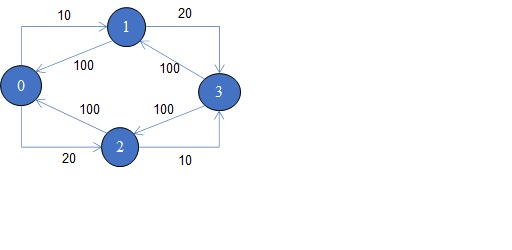

In [97]:
#display(Image('S02Q04_Imagem.jpg'))
display(Image('/content/S02Q04_Imagem.jpg'))

In [98]:
# Calcular e apresentar a matriz Q
Q = np.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0]], dtype=np.float64)

# Taxas de falha e recuperação
lambda_1 = 10
mu_1 = 100
lambda_2 = 20
mu_2 = 100

# Preencher a matriz Q
Q[0, 1] = lambda_1
Q[0, 2] = lambda_2
Q[1, 0] = mu_1
Q[1, 3] = lambda_2
Q[2, 0] = mu_2
Q[2, 3] = lambda_1
Q[3, 1] = mu_1
Q[3, 2] = mu_2

# Diagonal principal
Q[0, 0] = -(Q[0, 1] + Q[0, 2])
Q[1, 1] = -(Q[1, 0] + Q[1, 3])
Q[2, 2] = -(Q[2, 0] + Q[2, 3])
Q[3, 3] = -(Q[3, 1] + Q[3, 2])

print(Q)

[[ -30.   10.   20.    0.]
 [ 100. -120.    0.   20.]
 [ 100.    0. -110.   10.]
 [   0.  100.  100. -200.]]


In [99]:
# Calcular e imprimir a disponibilidade do cluster (valor 0,5)
# Colocar seu código aqui
PI = cmtcP(Q)
print(PI)
disponibilidade = PI[0] + PI[1] + PI[2]
disponibilidade

[0.75757576 0.07575758 0.15151515 0.01515152]


0.9848484848484843

In [100]:

# Calcular e imprimir disponibilidade do cluster (valor 0,5)
disponibilidade = PI[0] + PI[1] + PI[2]
disponibilidade

0.9848484848484843